 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [294]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [295]:
# Reading whale returns
whale_path = './Resources/whale_returns.csv'
whale_csv = pd.read_csv(whale_path)

In [296]:
# Count nulls
whale_csv.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [297]:
# Drop nulls
whale_csv_clean = whale_csv.dropna().copy()
whale_csv_clean.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [298]:
# Reading algorithmic returns
algo_path = './Resources/algo_returns.csv'
algo_csv = pd.read_csv(algo_path)

In [299]:
# Count nulls
algo_csv.isna().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [300]:
# Drop nulls
algo_scv_clean = algo_csv.dropna().copy()
algo_scv_clean.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [301]:
# Reading S&P 500 Closing Prices
sp500_history = './Resources/sp500_history.csv'
sp500_csv = pd.read_csv(sp500_history)
sp500_csv.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [302]:
# Check Data Types
sp500_csv.dtypes

Date     object
Close    object
dtype: object

In [303]:
# Fix Data Types
sp500_csv.set_index(pd.to_datetime(sp500_csv['Date'], infer_datetime_format=True), inplace=True)
sp500_csv.drop(columns=['Date'], inplace=True)
sp500_csv['Close'] = sp500_csv['Close'].str.replace("$", "")
sp500_csv['Close'] = sp500_csv['Close'].astype(float)
sp500_csv.head()

/var/folders/3z/5_lhcfz90xx22d09pj4ckh080000gq/T/ipykernel_41640/513762210.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_csv['Close'] = sp500_csv['Close'].str.replace("$", "")


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [304]:
# Calculate Daily Returns
sp500_returns = sp500_csv.pct_change()

In [305]:
# Drop nulls
sp500_returns_clean = sp500_returns.dropna()

In [306]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_clean.columns = ['SP500_Daily_Returns']
sp500_returns_clean.head()

,SP500_Daily_Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [307]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_csv_clean,algo_scv_clean, sp500_returns_clean], axis='rows', join='outer')
combined_returns.set_index(pd.to_datetime(combined_returns['Date'], infer_datetime_format=True), inplace=True)
combined_returns.drop(columns=['Date'], inplace=True)

combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,NaN,NaN,NaN
...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.003469
NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.000322
NaT,NaN,NaN,NaN,NaN,NaN,NaN,-0.007123


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

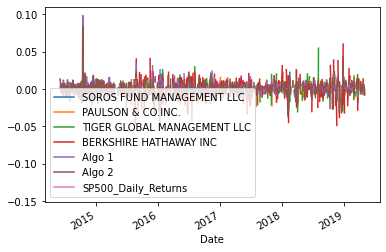

In [308]:
# Plot daily returns of all portfolios
combined_returns.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

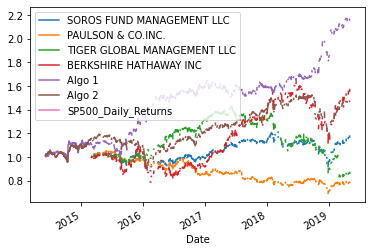

In [309]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (combined_returns + 1).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

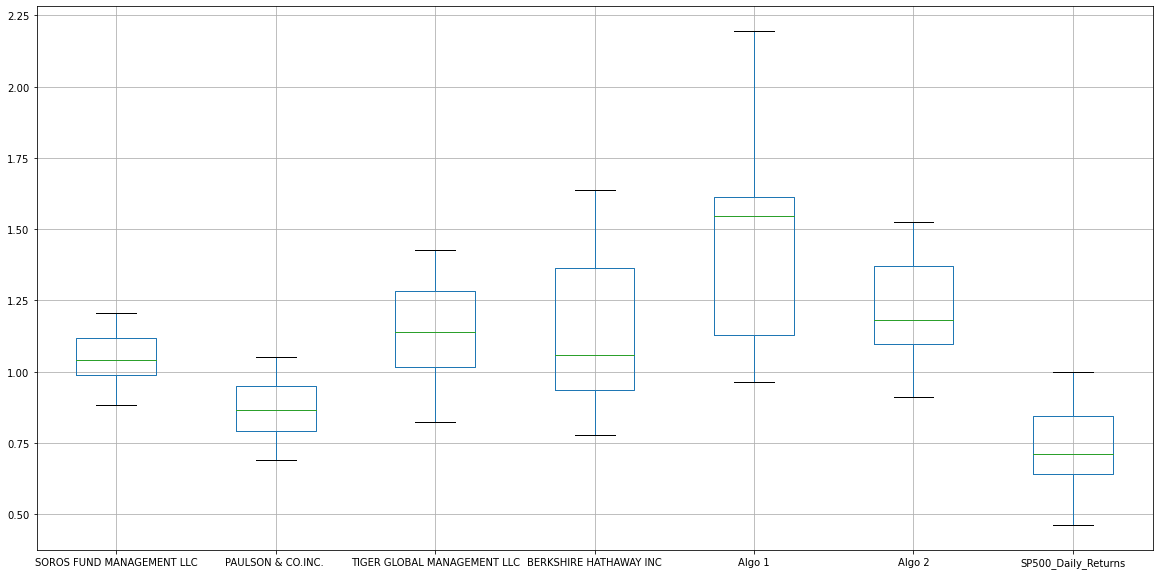

In [310]:
# Box plot to visually show risk
cumulative_returns.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [311]:
# Calculate the daily standard deviations of all portfolios
cumulative_std = cumulative_returns.std().sort_values()
cumulative_std


SOROS FUND MANAGEMENT LLC      0.073730
PAULSON & CO.INC.              0.088385
SP500_Daily_Returns            0.136956
TIGER GLOBAL MANAGEMENT LLC    0.151043
Algo 2                         0.159139
BERKSHIRE HATHAWAY INC         0.242778
Algo 1                         0.294720
dtype: float64

### Determine which portfolios are riskier than the S&P 500

<AxesSubplot:ylabel='Frequency'>

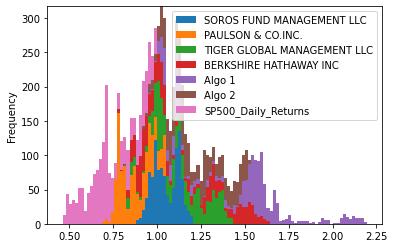

In [312]:
# Calculate  the daily standard deviation of S&P 500
sp500_returns_clean.std()

# Determine which portfolios are riskier than the S&P 

'''
Soros Fund Management and Paulson & Co.INC are both riskier than the S&P 500.
'''

cumulative_returns.plot.hist(stacked=True, bins=100)




### Calculate the Annualized Standard Deviation

In [313]:
# Calculate the annualized standard deviation (252 trading days)
annualized_cumulative_std = cumulative_std * np.sqrt(252)
annualized_cumulative_std.sort_values(ascending=True)


SOROS FUND MANAGEMENT LLC      1.170421
PAULSON & CO.INC.              1.403073
SP500_Daily_Returns            2.174109
TIGER GLOBAL MANAGEMENT LLC    2.397739
Algo 2                         2.526253
BERKSHIRE HATHAWAY INC         3.853978
Algo 1                         4.678542
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

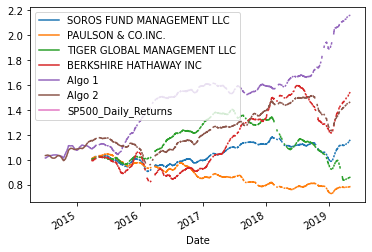

In [314]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std = cumulative_returns.rolling(window=21).mean()

# Plot the rolling standard deviation
combined_rolling_std.plot()


### Calculate and plot the correlation

<AxesSubplot:>

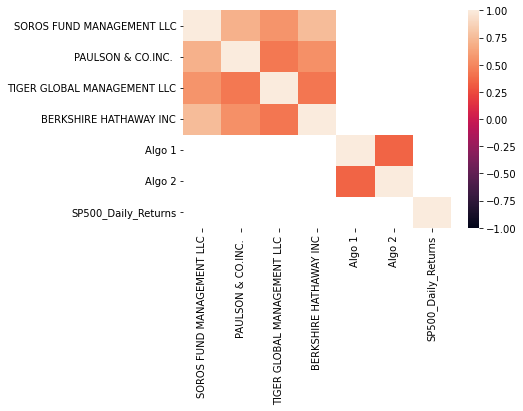

In [315]:
# Calculate the correlation
combined_correlation = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(combined_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [316]:
# Calculate covariance of a single portfolio
berkshire_variance = combined_returns['BERKSHIRE HATHAWAY INC'].var()

# Calculate variance of S&P 500
sp500_variance = combined_returns['SP500_Daily_Returns'].var()

# Computing beta
berkshire_beta = berkshire_variance / sp500_variance

# Plot beta trend
print(f'The beta for Berkshire Hathaway is: {berkshire_beta}')

The beta for Berkshire Hathaway is: 2.4878736169147517


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [349]:
# Use `ewm` to calculate the rolling window
combined_ewm = combined_returns.rolling(window=21).mean()
combined_ewm.ewm(alpha=0.5, min_periods=21)
combined_ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.002256
NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.001115
NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.001147


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [318]:
# Annualized Sharpe Ratios
risk_free_rate_2020 = 2.5
annualized_sharpe_ratios = ((combined_returns.mean()-(combined_returns * risk_free_rate_2020).mean()) * 252) / (combined_returns.std() * np.sqrt(252))
annualized_sharpe_ratios


SOROS FUND MANAGEMENT LLC     -0.542352
PAULSON & CO.INC.              0.693196
TIGER GLOBAL MANAGEMENT LLC    0.177386
BERKSHIRE HATHAWAY INC        -0.929441
Algo 1                        -1.950264
Algo 2                        -0.958887
SP500_Daily_Returns            1.161608
dtype: float64

<AxesSubplot:title={'center':'Combined Sharpe Ratios'}>

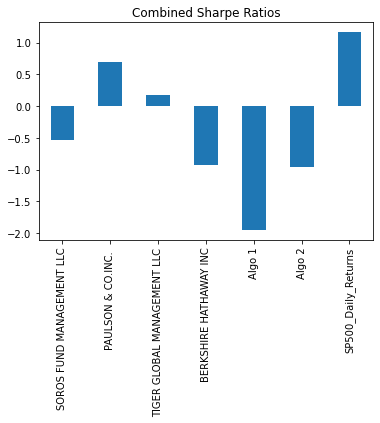

In [319]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot.bar(title='Combined Sharpe Ratios')


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

According to the bar chart, the algo strategies have not outperformed the S&P 500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [320]:
# Reading data from 1st stock
google_path = './Resources/goog_historical.csv'
google_csv = pd.read_csv(google_path, index_col='Trade DATE')

In [321]:
# Reading data from 2nd stock
apple_path = './Resources/aapl_historical.csv'
apple_csv = pd.read_csv(apple_path, index_col='Trade DATE')

In [322]:
# Reading data from 3rd stock
costco_path = './Resources/cost_historical.csv'
costco_csv = pd.read_csv(costco_path, index_col='Trade DATE')


In [323]:
# Combine all stocks in a single DataFrame
df_combined_stocks = pd.concat([google_csv, apple_csv, costco_csv], axis="columns", join="inner")
df_combined_stocks

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
5/9/2019,GOOG,1162.38,AAPL,200.72,COST,243.47
5/8/2019,GOOG,1166.27,AAPL,202.90,COST,241.34
5/7/2019,GOOG,1174.10,AAPL,202.86,COST,240.18
5/6/2019,GOOG,1189.39,AAPL,208.48,COST,244.23
5/3/2019,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
5/17/2018,GOOG,1078.59,AAPL,186.99,COST,199.60
5/16/2018,GOOG,1081.77,AAPL,188.18,COST,198.71
5/15/2018,GOOG,1079.23,AAPL,186.44,COST,195.48


In [324]:
# Reset Date index


In [325]:
# Reorganize portfolio data by having a column per symbol
new_columns = ["Symbol", "Goog", "Symbol", "Aapl", "Symbol", "Cost"]
df_combined_stocks.columns = new_columns
df_combined_stocks.drop(columns=['Symbol'], inplace=True)
df_combined_stocks

,Goog,Aapl,Cost
Trade DATE,,,
5/9/2019,1162.38,200.72,243.47
5/8/2019,1166.27,202.90,241.34
5/7/2019,1174.10,202.86,240.18
5/6/2019,1189.39,208.48,244.23
5/3/2019,1185.40,211.75,244.62
...,...,...,...
5/17/2018,1078.59,186.99,199.60
5/16/2018,1081.77,188.18,198.71
5/15/2018,1079.23,186.44,195.48


In [326]:
# Calculate daily returns
stock_daily_returns = df_combined_stocks.pct_change()

# Drop NAs
stock_daily_returns.dropna()

# Display sample data
stock_daily_returns.head()

,Goog,Aapl,Cost
Trade DATE,,,
5/9/2019,NaN,NaN,NaN
5/8/2019,0.003347,0.010861,-0.008749
5/7/2019,0.006714,-0.000197,-0.004806
5/6/2019,0.013023,0.027704,0.016862
5/3/2019,-0.003355,0.015685,0.001597


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [327]:
# Set weights
weights = [.33, .33, .33]

# Calculate portfolio return
portfolio_returns = stock_daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
5/9/2019         NaN
5/8/2019    0.001801
5/7/2019    0.000564
5/6/2019    0.019004
5/3/2019    0.004596
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [336]:
# Join your returns DataFrame to the original returns DataFrame
new_combined_returns = combined_returns.append(stock_daily_returns, ignore_index=True)
new_combined_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns,Goog,Aapl,Cost
4187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011469,0.003650,0.003217
4188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002948,0.006364,-0.004459
4189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002348,-0.009246,-0.016255
4190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019431,0.009172,0.002046
4191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001763,0.002339,-0.000613


In [339]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_combined_returns.dropna(how='all', inplace=True)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [341]:
# Calculate the annualized `std`
new_combined_std = new_combined_returns.std()
new_combined_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
Algo 2                         0.008466
SP500_Daily_Returns            0.008135
Goog                           0.016714
Aapl                           0.018923
Cost                           0.013439
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

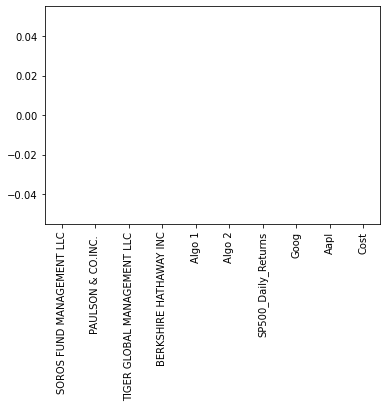

In [353]:
# Calculate rolling standard deviation
new_combined_rolling_std = new_combined_std.rolling(window=21).mean()

# Plot rolling standard deviation
new_combined_rolling_std.plot(kind='bar')

### Calculate and plot the correlation

In [332]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [333]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [334]:
# Calculate Annualzied Sharpe Ratios


In [335]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!